In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [24]:
df = pd.read_csv('../data/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [25]:
df.drop(columns=['ID'], inplace=True)

df['EDUCATION'].replace({1: 'Postgraduate', 2: 'Graduate', 3: 'High School', 4: 'Others'}, inplace=True)
df['MARRIAGE'].replace({1: 'Married', 2: 'Single', 3: 'Others'}, inplace=True)
df['SEX'].replace({1: 'Male', 2: 'Female'}, inplace=True)

df.head()


C:\Users\idrib\AppData\Local\Temp\ipykernel_2572\324912164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EDUCATION'].replace({1: 'Postgraduate', 2: 'Graduate', 3: 'High School', 4: 'Others'}, inplace=True)
C:\Users\idrib\AppData\Local\Temp\ipykernel_2572\324912164.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,Female,Graduate,Married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,Graduate,Single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,Graduate,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,Graduate,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,Graduate,Married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


C:\Users\idrib\AppData\Local\Temp\ipykernel_2572\1614486473.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette="pastel")


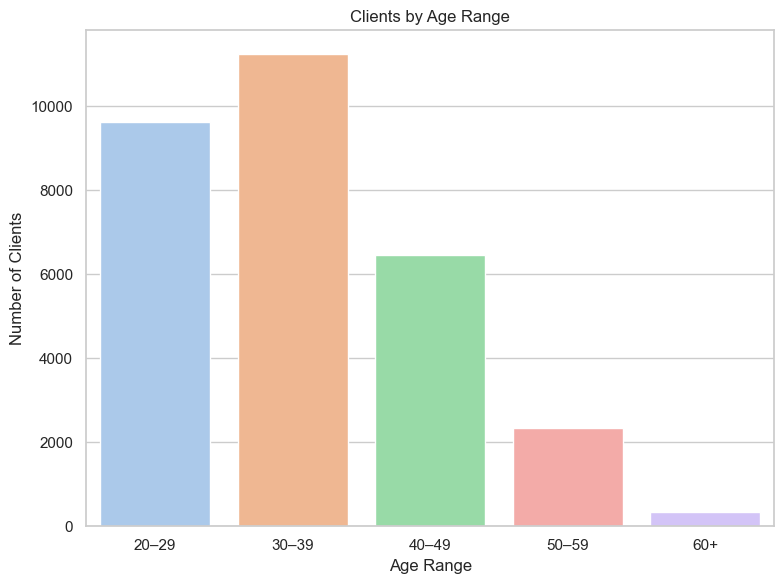

In [26]:
#creating age range and categorizing
bins = [20, 30, 40, 50, 60, 100]  
labels = ['20–29', '30–39', '40–49', '50–59', '60+']  

df['AGE_RANGE'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
df['AGE_RANGE'].value_counts().sort_index()


#plotting age range
sns.set_theme(style="whitegrid")

age_counts = df['AGE_RANGE'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette="pastel")

plt.title("Clients by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Number of Clients")

plt.tight_layout()
plt.show()